In [1]:
#Code from http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data= pd.read_excel('OutputScriptMarie_KovatsMatchOnly70.xlsx.xlsx', sheetname ='to use for NDMS')

data_Obt = data[data['Species'].str.contains('obt')] 
data_Dil = data[data['Species'].str.contains('dil')] 
data_Stri = data[data['Species'].str.contains('stri')] 
data_Cil = data[data['Species'].str.contains('cil')] 
data_Hur = data[data['Species'].str.contains('hur')]

Cil = np.repeat(4, data_Cil.shape[1])
Dil = np.repeat(2, data_Dil.shape[1])
Hur = np.repeat(3, data_Hur.shape[1])
Str = np.repeat(1, data_Stri.shape[1])
Obt = np.repeat(0, data_Obt.shape[1])
Species = np.concatenate((Obt, Dil, Str))

datH = data_Hex.T
datO = data_Obt.T
#datS = data_S.T
datSt = data_Stri.T
datD = data_Dil.T

dataAll = np.vstack((datO, datSt, datD))
dataAll.shape

(49, 450)

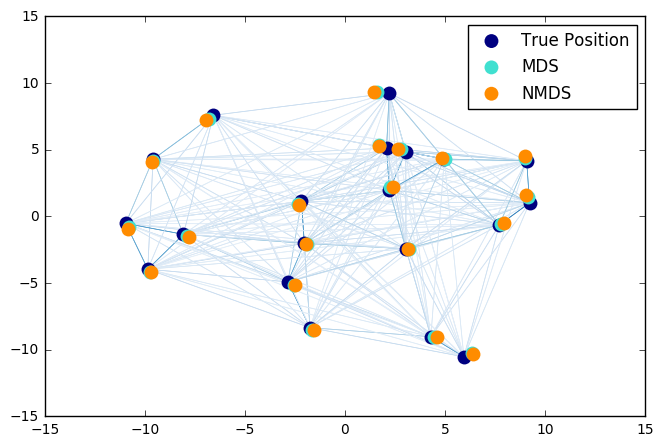

In [3]:
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()

In [40]:
similarities = euclidean_distances(dataAll)
mds = manifold.MDS( max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)

pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(metric=False,n_components = 2,max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)

npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((dataAll ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((dataAll ** 2).sum()) / np.sqrt((npos ** 2).sum())



clf = PCA()

pos = clf.fit_transform(pos)
npos = clf.fit_transform(npos)

nmds.stress_

0.1306361741848161

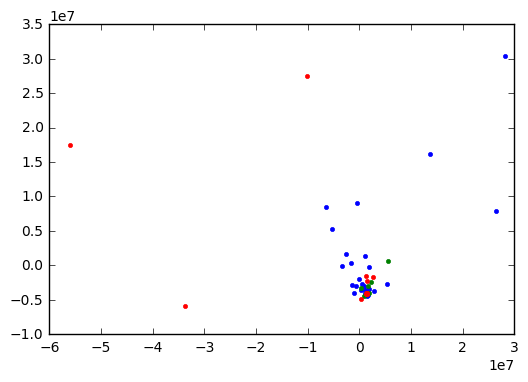

In [41]:
fig = plt.figure(1)
for sp in set(Species):
    #myspecies = iris.species.str.contains(sp)
    plt.plot(pos[Species==sp,0],
            pos[Species==sp, 1], 
            '.'
            )

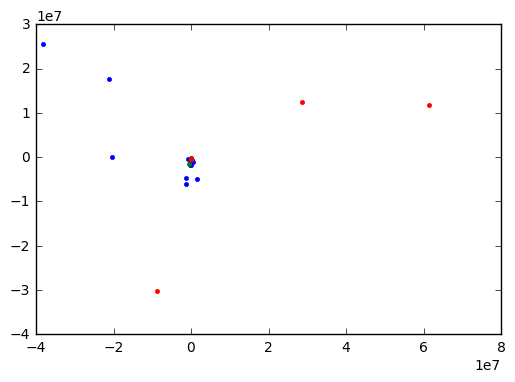

In [42]:
fig = plt.figure(1)
for sp in set(Species):
    #myspecies = iris.species.str.contains(sp)
    plt.plot(npos[Species==sp,0],
            npos[Species==sp, 1], 
            '.'
            )